In [112]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

tryb obrazu RGB
rozmiar (409, 311)


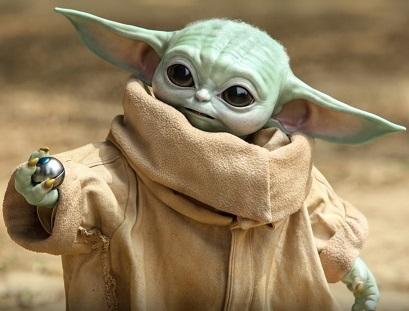

In [113]:
im = Image.open('baby_yoda.jpg')
print("tryb obrazu", im.mode)
print("rozmiar", im.size)
im

In [114]:
def zakres(w, h):  # funkcja, która uprości podwójna petle for
    return [(i, j) for i in range(w) for j in range(h)]

zmiana wartości pikseli za pomocą metod getpixel i putpixel

In [115]:
def pobierz_kolor_pixela(obraz, m, n):  # m, n współrzędne punktu na obrazie
    w, h = obraz.size
    if m < w and n < h:
        kolor = obraz.getpixel((m, n))
    return kolor


print(pobierz_kolor_pixela(im, 260, 200))

(154, 126, 89)


In [ ]:
def wstaw_pixel_w_punkt(obraz, m, n, kolor):  # m, n współrzędne punktu na obrazie, kolor -  dane pixela do wstawienia
    w, h = obraz.size
    if m < w and n < h:
        obraz.putpixel((m, n), kolor)
    return obraz


def wstaw_pixel_w_zakresie(obraz, m, n, kolor, w_z, h_z):  # w miejscu m,n wstawia prostokąt o bokach w_z, h_z
    w, h = obraz.size
    for i, j in zakres(w_z, h_z):
        if i + m < w and j + n < h:
            obraz.putpixel((i + m, j + n), kolor)
    return obraz

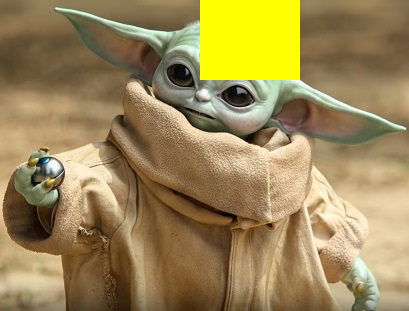

In [138]:
im1 = im.copy()
wstaw_pixel_w_zakresie(im1, 200, -120, (255, 255, 0), 100, 200)



In [118]:
def rozjasnij_obraz_w_zakresie(obraz, m, n, a, b, c, w_z, h_z):  # w miejscu m,n "rozjaśnia" prostokat o wymiaraxh w_z, h_z
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w_z, h_z):
        if i + m < w and j + n < h:
            p = obraz.getpixel((i + m, j + n))
            obraz1.putpixel((i + m, j + n), (p[0] + a, p[1] + b, p[2] + c))
    return obraz1

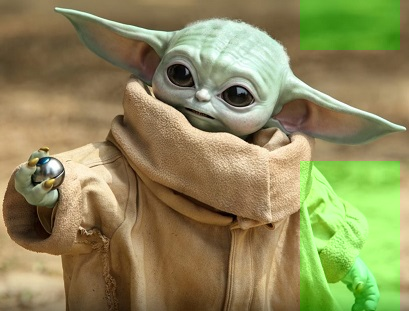

In [119]:
im2 = im.copy()
rozjasnij_obraz_w_zakresie(im2, 300, -150, -50, 50, -40, 100, 200)

In [120]:
def skopiuj_obraz_w_zakresie(obraz, m, n, m1, n1, w_z, h_z):  # kopiuje prostokat o wymiarach w_z, h_z z miejsca m,n i wstawia w miejscu m1,n1
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w_z, h_z):
        if i+m < w and j+n < h:
            p = obraz.getpixel((i + m, j + n))
            if i + m1 < w and j + n1 < h:
                obraz1.putpixel((i + m1, j + n1), p)
    return obraz1

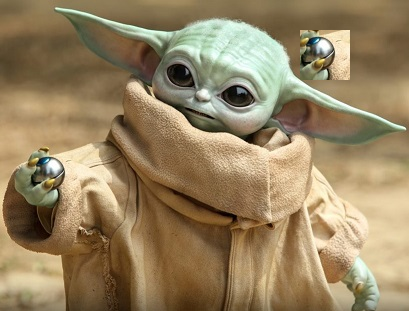

In [121]:
im3 = im.copy()
skopiuj_obraz_w_zakresie(im3, 30, 150, 300, 30, 50, 50)

In [122]:
def rozjasnij_obraz_z_maska(obraz, maska, m, n, a, b, c):  # w miejscu m, n zmienia tylko te pixele, które odpowiadają czarnym pixelom maski, maska jest obrazem czarnobiałym
    obraz1 = obraz.copy()
    w, h = obraz.size
    w0, h0 = maska.size
    for i, j in zakres(w0, h0):
        if i + m < w and j + n < h:
            if maska.getpixel((i, j)) == 0:
                p = obraz.getpixel((i + m, j + n))
                obraz1.putpixel((i + m, j + n), (p[0] + a, p[1] + b, p[2] + c))
    return obraz1

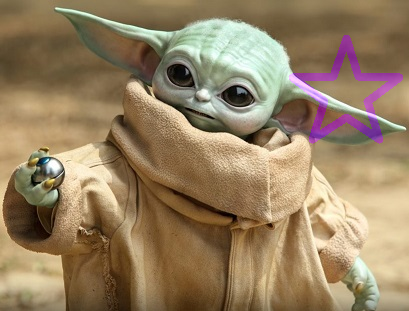

In [123]:
im4 = im.copy()
maska = Image.open('gwiazdka.bmp')
rozjasnij_obraz_z_maska(im4, maska, 270, 0, 20, -50, 80)

In [124]:
def dodaj_szum(obraz, n, kolor1, kolor2):  # dodawanie szumu typu salt and pepper
    w, h = obraz.size
    x, y = np.random.randint(0, w, n), np.random.randint(0, h,
                                                         n)  # powtarza n razy losowanie z zakresu 0,w i z zakresu 0,h
    for (i, j) in zip(x, y):  # zip robi pary z list x,y
        obraz.putpixel((i, j), (kolor1 if np.random.rand() < 0.5 else kolor2))  # salt-and-pepper
    return obraz

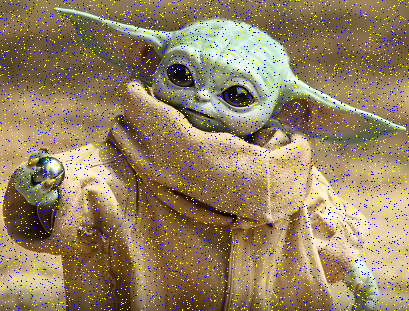

In [125]:
im5 = im.copy()
dodaj_szum(im5, 10000, (255,255,0), (0,0,255))

zmiana wartości pikseli za pomocą metody  load

In [126]:
def zastosuj_funkcje(image, func):
    w, h = image.size
    pixele = image.load()
    for i, j in zakres(w, h):
        pixele[i, j] = func(pixele[i, j])



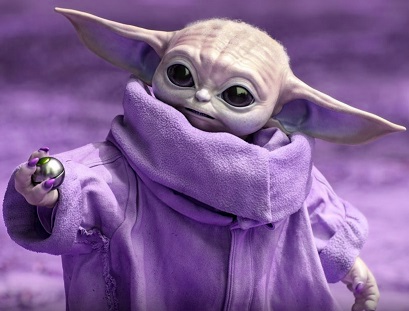

In [127]:
def przestaw_kolory(pixel):
    return (pixel[1], pixel[2], pixel[0])

im6 = im.copy()
zastosuj_funkcje(im6, przestaw_kolory)
im6

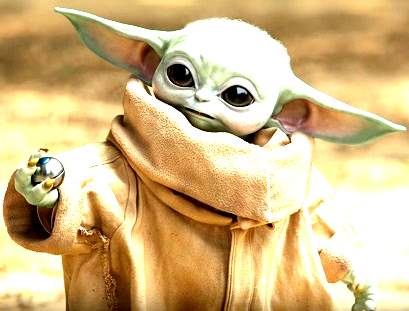

In [128]:
def filtr_liniowy(image, a, b): # a, b liczby całkowite
    w, h = image.size
    pixele = image.load()
    for i, j in zakres(w, h):
        pixele[i, j] = (pixele[i, j][0]* a + b, pixele[i, j][1]* a + b, pixele[i, j][2]* a + b)

im7 = im.copy()
filtr_liniowy(im7, 2, -50)
im7

zmiana wartości pikseli za pomocą metody  point

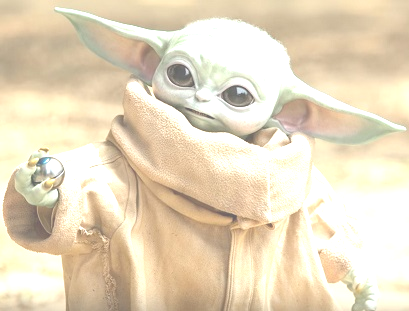

In [129]:
im8 = im.copy()
im8 = im8.point(lambda i: i + 100) # funkcja rozjasnia kazdy piksel o 100
im8

In [130]:
def efekt_plakatu(im, wsp):
    return im.point(lambda i: i > wsp and 255)  # jeżeli nieprawda, że i > wsp wstaw 0 a w przeciwnym przypadku wstaw 255

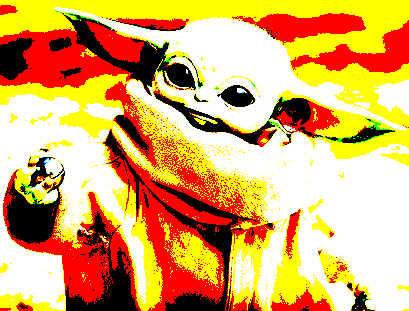

In [131]:
im9 = im.copy()
efekt_plakatu(im9, 100)

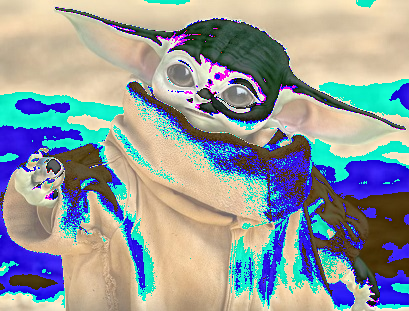

In [132]:
# dlaczego poniższe polececiania nie rozjasniaja obrazu tak jak funkcja "rozjaśnij"
obraz = im.copy()
T = np.array(obraz, dtype='uint8')
T += 100
obraz_wynik = Image.fromarray(T, "RGB")
obraz_wynik